### Codio Activity 12.7: KNN for Regression and Imputation

This activity extends the use of K Nearest Neighbors to the problem of regression.  While typically not as high performing in predictive models, the KNN model for regression can be an effective approach to imputing missing data.  You will explore both of these ideas using scikit-learn, where there exists the `KNeighborsRegressor` and the `KNNImputer`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")

### The Data

To begin you will use a dataset accessed from the R languages DAAG package containing information on possums trapped at seven different sites in Australia.  It is loaded and displayed below.  Your regression task will be to predict the head size using the other features.  The training and testing data is created for you below as well.

In [3]:
possums_missing = pd.read_csv('codio_12_7_solution/data/possum.csv')
possums_missing.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
possums_missing.info() #note the missing values -- we will drop these to begin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
possums = possums_missing.dropna()
possums.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [6]:
X = possums.drop(['skullw', 'Pop'], axis = 1)

In [7]:
y = possums.skullw

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 34)

### Problem 1

#### A Basic Regression Pipeline

Use the `make_column_transformer` function to define a transformer instance named `transformer`. Apply a `OneHotEncoder` transformation with `drop = 'if_binary'` to the `sex` column. Transform the `remainder` columns using `StandardScaler()`.


Next, build a basic regression pipeline with steps `transformer` and `knn` that binarizes the categorical feature  and feeds these into a `KNeighborsRegressor` with all default settings. Assign your pipeline to `knn_pipe`.

Use the `fit` function to fit the pipeline to the training sets.

Use the `predict` function on `knn_pipe` to make predictions on `X_test`. Assign the result to `preds`.

Finally, use the `mean_squared_error` function to compute the MSE between `y_test` and `preds`. Assign the results to `test_mse`.

In [9]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['sex']), remainder = StandardScaler())
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'), ['sex'])])

In [10]:
knn_pipe = Pipeline([('transformer',transformer),
                     ('knn', KNeighborsRegressor())])
knn_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knn', KNeighborsRegressor())])

In [11]:
knn_pipe.fit(X_train,y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knn', KNeighborsRegressor())])

In [12]:
preds = knn_pipe.predict(X_test)
preds

array([57.  , 53.76, 56.28, 56.22, 55.18, 57.22, 56.04, 58.28, 59.42,
       59.04, 53.58, 56.34, 57.96, 55.52, 56.6 , 56.5 , 56.64, 56.38,
       56.84, 57.3 , 53.8 , 57.94, 55.36, 57.98, 54.12, 55.34])

In [13]:
test_mse = mean_squared_error(y_test,preds)
test_mse

9.236092307692314

### Problem 2

#### GridSearch the Pipeline

Define a dictionary `params`. The key of this dictionary will be `'knn__n_neighbors'`, the values will be equal to `range(1, len(y_test), 2)`.

Use the `GridSearchCV` function to perform a grid search on `knn_pipe` with `param_grid` equal to `params`.

Use the `fit` function to fit the pipeline to the training sets.

Use the `best_params_` method on `knn_pipe` with argument `'knn__n_neighbors'`. Assign the result to `best_k` below.

In [14]:
params = {'knn__n_neighbors': range(1, len(y_test), 2)}
params

{'knn__n_neighbors': range(1, 26, 2)}

In [16]:
knn_grid = GridSearchCV(knn_pipe, param_grid = params)
knn_grid

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': range(1, 26, 2)})

In [17]:
knn_grid.fit(X_train,y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex'])])),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': range(1, 26, 2)})

In [18]:
best_k = knn_grid.best_params_['knn__n_neighbors']
best_k

3

In [19]:
best_knn_pipe = Pipeline([('transformer',transformer),
                     ('knn', KNeighborsRegressor(knn_n_neighbors = 3))])
best_knn_pipe

TypeError: KNeighborsRegressor.__init__() got an unexpected keyword argument 'knn_n_neighbors'. Did you mean 'n_neighbors'?

In [20]:
best_knn_pipe = Pipeline([('transformer',transformer),
                     ('knn', KNeighborsRegressor(n_neighbors = 3))])
best_knn_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [21]:
best_knn_pipe.fit(X_train,y_train)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [22]:
best_preds = best_knn_pipe.predict(X_test)
best_preds

array([56.7       , 54.13333333, 56.03333333, 56.23333333, 54.76666667,
       57.76666667, 54.66666667, 57.8       , 58.76666667, 58.86666667,
       53.63333333, 56.03333333, 56.53333333, 55.46666667, 56.66666667,
       55.76666667, 56.33333333, 56.86666667, 56.33333333, 56.2       ,
       54.23333333, 58.76666667, 54.86666667, 57.46666667, 54.26666667,
       55.03333333])

In [23]:
best_mse = mean_squared_error(y_test,best_preds)

In [24]:
best_mse

10.888547008547011

### Problem 3

#### Handling the missing data

Earlier, we dropped the rows containing missing data.  If we wanted to keep these rows for our model we need to make a decision about what values to fill in.  The `KNNImputer` uses the K Nearest Neighbor algorithm in order to determine this value.  Intuitively, you could see the argument for this where you use similar observations to stand in for the missing values.  

```
Each sample's missing values are imputed using the mean value from `n_neighbors` nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.
```



Use the `make_column_transformer` function to define a transformer instance named `transformer`. Apply a `OneHotEncoder` transformation with `drop = 'if_binary'` to the `sex` column. Transform the `remainder` columns using `StandardScaler()`.


Next, build a basic regression pipeline with steps `'transform'`, `'impute'`, and `'model'`. Assign `transformer` to `'transform'`, `KNNImputer()` to `'impute'`, and `KNeighborsRegressor()` to `'model'`.

Use the `fit` function to fit the pipeline to the `X_train_missing` and `y_train_missing`.

Use the `predict` function on `imputer_pipe` to make predictions on `X_test_missing`. Assign the result to `preds`.

Finally, use the `mean_squared_error` function to compute the MSE between `y_test_missing` and `preds`. Assign the results to `test_mse`.

In [28]:
X = possums_missing.drop(['skullw','Pop'], axis = 1)
y = possums_missing['skullw']

In [29]:
X_train_missing, X_test_missing, y_train_missing, y_test_missing = train_test_split(X,y,random_state = 43)
X_train_missing.head()

,case,site,sex,age,hdlngth,totlngth,taill,footlgth,earconch,eye,chest,belly
39,40,2,f,3.0,91.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
96,97,7,m,3.0,91.0,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,m,5.0,93.2,84.0,35.0,65.6,44.3,14.5,28.5,32.0
88,89,7,m,6.0,97.7,84.5,35.0,64.4,46.2,14.4,29.0,30.5
33,34,2,m,2.0,90.6,85.5,36.5,73.1,53.1,14.4,26.0,28.5


In [30]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'),['sex']),
                                     remainder = StandardScaler())
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'), ['sex'])])

In [32]:
imputer_pipe = Pipeline([('transform',transformer),('impute',KNNImputer()),('model',KNeighborsRegressor())])
imputer_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('impute', KNNImputer()), ('model', KNeighborsRegressor())])

In [33]:
imputer_pipe.fit(X_train_missing,y_train_missing)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('impute', KNNImputer()), ('model', KNeighborsRegressor())])

In [34]:
preds = imputer_pipe.predict(X_test_missing)

In [36]:
missing_mse = mean_squared_error(y_test_missing, preds)
missing_mse

3.4073538461538493

### Problem 4

#### Grid Searching the Pipeline

Define a dictionary `params`. The keys of this dictionary will be `'model__n_neighbors'` and `'impute__n_neighbors'` with values  `range(1, len(y_test), 2)` and `[1, 2, 3, 4, 5]`, respectively.

Use the `GridSearchCV` function to perform a grid search on `imputer_pipe` with `param_grid` equal to `params`. Assign the resul to `imputer_grid`.

Use the `fit` function to fit `imputer_grid` to `X_train_missing` and `y_train_missing`.

Use the `best_params_` method on `imputer_grid`. Assign the result to `best_ks` below.

Use the `predict` functions on `imputer_grid` to calculate the predictions on `X_test_missing`. Assign the result to `preds`.

Finally, use the `mean_squared_error` function to calculate the MSE between `y_test_missing` and `preds`. Assign
the mean squared error to `imputer_mse` below.  

In [37]:
params = {'model__n_neighbors':range(1, len(y_test_missing),2), 'impute__n_neighbors': [1,2,3,4,5]}
params

{'model__n_neighbors': range(1, 26, 2), 'impute__n_neighbors': [1, 2, 3, 4, 5]}

In [39]:
imputer_grid = GridSearchCV(imputer_pipe, param_grid = params)
imputer_grid

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex'])])),
                                       ('impute', KNNImputer()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'impute__n_neighbors': [1, 2, 3, 4, 5],
                         'model__n_neighbors': range(1, 26, 2)})

In [40]:
imputer_grid.fit(X_train_missing, y_train_missing)

/opt/miniconda3/envs/Linlin/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex'])])),
                                       ('impute', KNNImputer()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'impute__n_neighbors': [1, 2, 3, 4, 5],
                         'model__n_neighbors': range(1, 26, 2)})

In [41]:
best_ks = imputer_grid.best_params_
best_ks

{'impute__n_neighbors': 2, 'model__n_neighbors': 5}

In [42]:
preds = imputer_grid.predict(X_test_missing)

In [43]:
imputer_mse = mean_squared_error(y_test_missing, preds)
imputer_mse

3.4073538461538493

### Problem 5

#### Interpreting the model

Unlike linear regression, we have no parameters from the resulting model to investigate and understand the effect of increasing or decreasing certain features based on these coefficients.  All hope is not lost however, as you can simulate this behavior by running through different values of each feature and exploring how the predictions from the model change.

This is the idea behind the `partial_dependence` function in scikit-learn.  Note that it works in a similar manner to the confusion matrix display from earlier.  For a deeper discussion/example of partial dependence plots see the user guide [here](https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence). Below, the Partial Dependence plots for six features are plotted.  Which feature seems more important -- `hdlngth` or `footlgth` based on these plots.  Assign your response as a string to `ans5` below. 

Again, the big idea is the x-axis represents increasing values of the feature and the y values represent the predicted value of the target.  The code that produced the plots is shown below as well as the plot. 

```python
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
fig, ax = plt.subplots(figsize = (20, 6))
PartialDependenceDisplay.from_estimator(pipe, X, features = ['hdlngth', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest'], ax = ax)
ax.set_title('Partial Dependence Plots for 6 Features')
```

<center>
    <img src = 'images/part_dep.png'/>
</center>


Text(0.5, 1.0, 'Partial Dependence Plots for 6 Features')

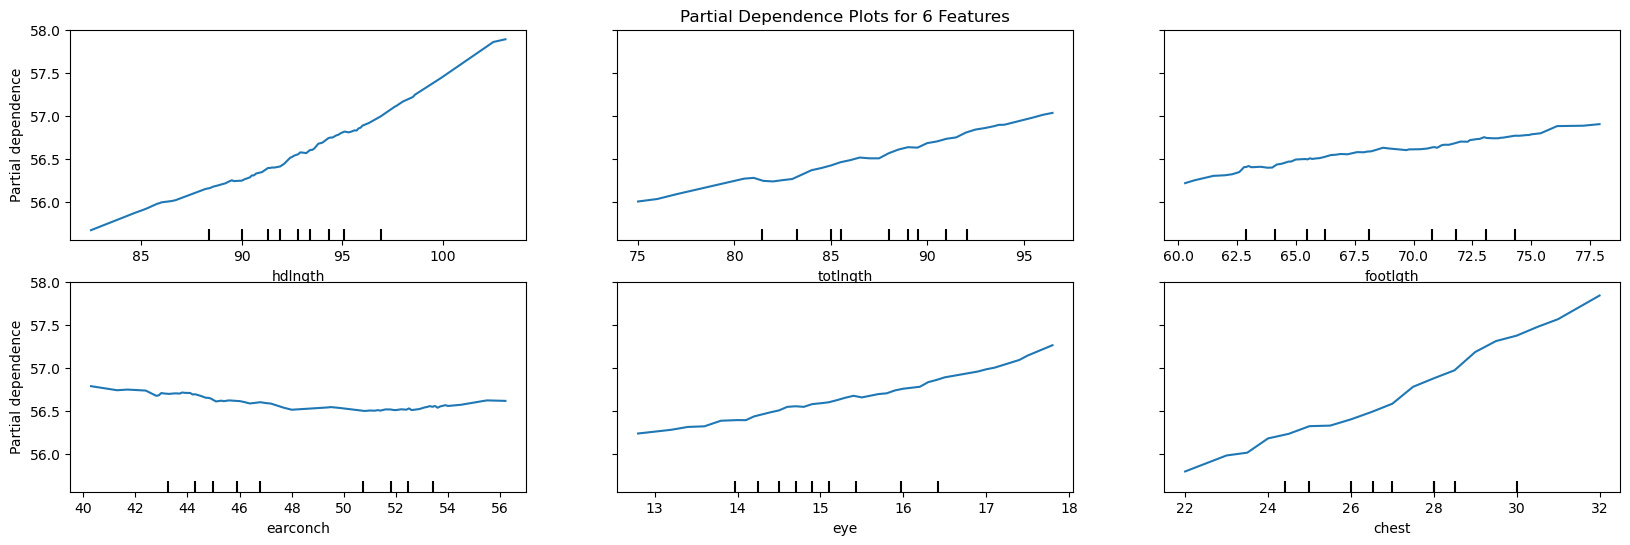

In [45]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
fig, ax = plt.subplots(figsize = (20, 6))
PartialDependenceDisplay.from_estimator(knn_pipe, X, features = ['hdlngth', 'totlngth', 'footlgth', 'earconch', 'eye', 'chest'], ax = ax)
ax.set_title('Partial Dependence Plots for 6 Features')

In [46]:
ans5 = 'hdlngth'

In a similar way, you could understand the features and their importance in the case of KNN for classification through partial dependence plots -- another situation where after fitting the model you do not get parameters.  In the next module, you will explore a classification method called Logistic Regression that does solve classification problems and contains coefficients after fitting. 